In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

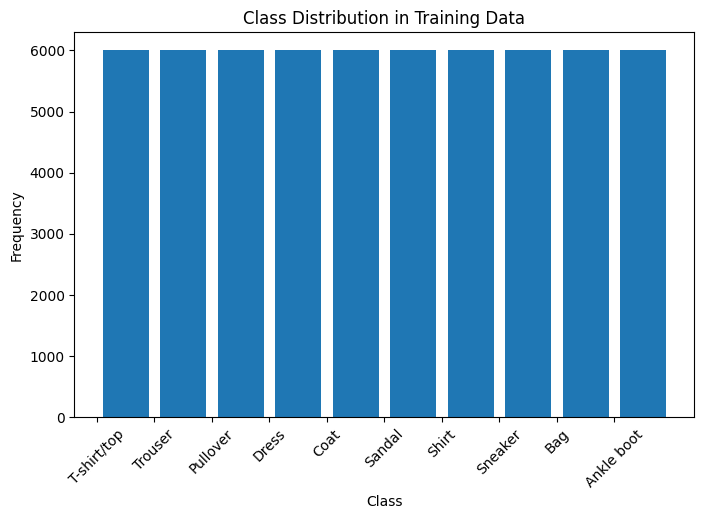

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(train_labels, bins=range(11), rwidth=0.8)
plt.xticks(range(10), class_names, rotation=45)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

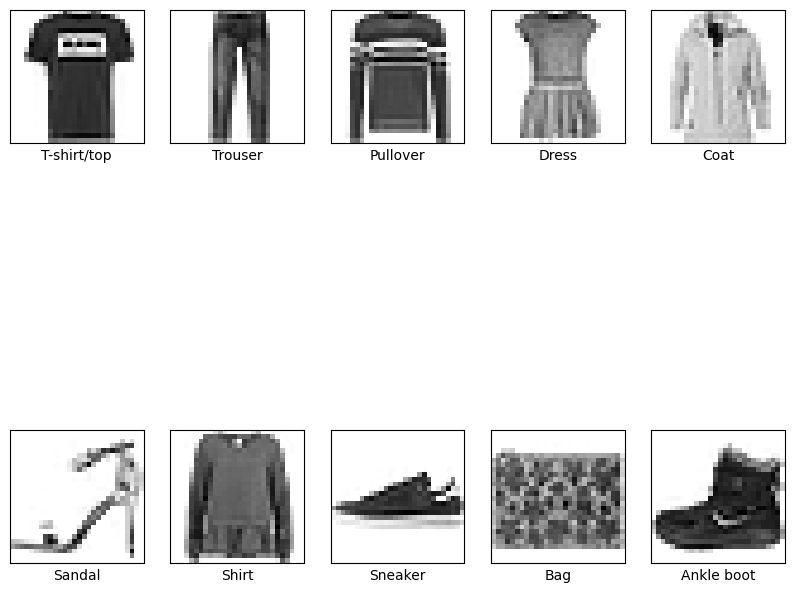

In [7]:
plt.figure(figsize=(10, 10))
for i in range(10):
    idx = np.where(train_labels == i)[0]
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx[0]], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.show()


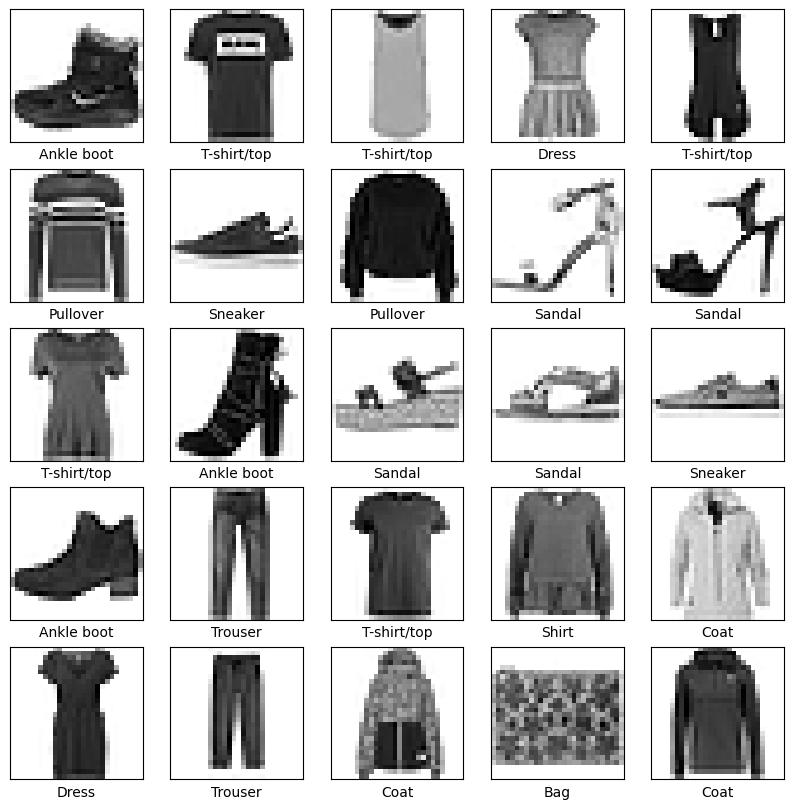

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [8]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4954 - accuracy: 0.8264 - val_loss: 0.4388 - val_accuracy: 0.8432
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3707 - accuracy: 0.8662 - val_loss: 0.3658 - val_accuracy: 0.8703
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3318 - accuracy: 0.8781 - val_loss: 0.3682 - val_accuracy: 0.8665
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3111 - accuracy: 0.8856 - val_loss: 0.3779 - val_accuracy: 0.8686
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2935 - accuracy: 0.8913 - val_loss: 0.3532 - val_accuracy: 0.8719
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2797 - accuracy: 0.8962 - val_loss: 0.3395 - val_accuracy: 0.8768
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2688 - accuracy: 0.8998 - val_loss: 0.3502 - val_accura

In [9]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8872
Test Accuracy: 0.8871999979019165


In [10]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


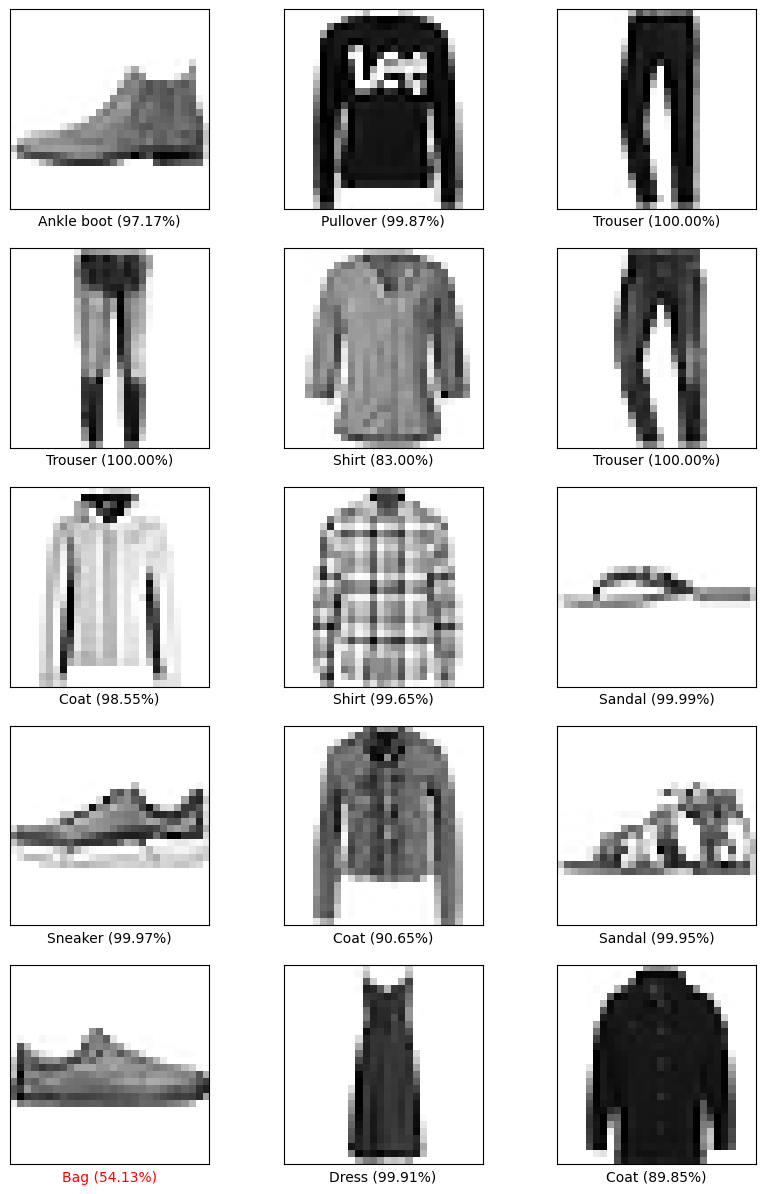

In [16]:
plt.figure(figsize=(10, 15))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
        color = 'black'
    else:
        color = 'red'
    plt.xlabel("{} ({:.2f}%)".format(class_names[predicted_label],
                                      100 * np.max(predictions[i])),
                                      color=color)
plt.show()

In [13]:
single_image = test_images[0]
single_image_label = test_labels[0]
single_image_prediction = model.predict(np.expand_dims(single_image, axis=0))
predicted_label = np.argmax(single_image_prediction)

1/1 [==============================] - 0s 20ms/step


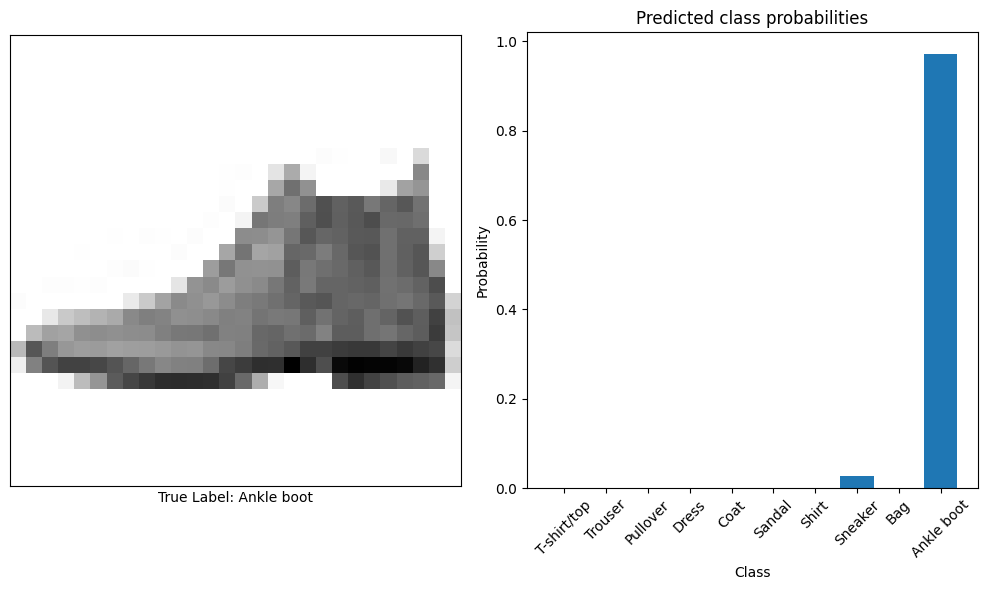

In [18]:
plt.figure(figsize=(10, 6))

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(single_image, cmap=plt.cm.binary)
plt.xlabel('True Label: {}'.format(class_names[np.argmax(single_image_label)]))
plt.xticks([])
plt.yticks([])

# Plot the probability graph
plt.subplot(1, 2, 2)
plt.bar(range(10), single_image_prediction[0])
plt.xticks(range(10), class_names, rotation=45)
plt.title('Predicted class probabilities')
plt.xlabel('Class')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

In [15]:
print("Predicted Label:", class_names[predicted_label])
print("True Label:", class_names[np.argmax(single_image_label)])

Predicted Label: Ankle boot
True Label: Ankle boot
